In [469]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


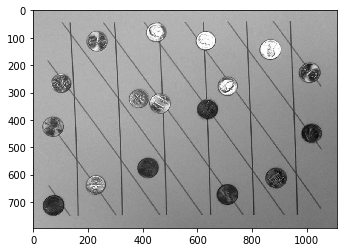

In [510]:
image=cv.imread("resources/coins.jpg",0)
plt.imshow(image, cmap = "gray")

(array([  0, 255], dtype=uint8), array([849773,  32677], dtype=int64))


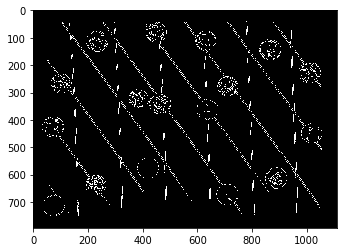

In [514]:
edges = cv.Canny(image, 150, 250)
print(np.unique(edges, return_counts = True))
plt.imshow(edges, cmap = "gray")

In [515]:
edge_points = np.argwhere(edges > 0)
edge_points.shape

(32677, 2)

In [516]:
H,W = image.shape
max_p = int(np.hypot(H, W))
M = np.zeros((180, max_p * 2))


In [517]:
thetas = np.arange(0,180, 1)
for i, e in enumerate(edge_points):
    for t, theta in enumerate(thetas):
        theta = np.deg2rad(theta)
        p = int(e[0] * np.cos(theta) + e[1] * np.sin(theta))
        M[t, p + max_p] += 1
    if i % 100 == 0:
        print(i, "from ", len(edge_points))
a = 0

0 from  32677
100 from  32677
200 from  32677
300 from  32677
400 from  32677
500 from  32677
600 from  32677
700 from  32677
800 from  32677
900 from  32677
1000 from  32677
1100 from  32677
1200 from  32677
1300 from  32677
1400 from  32677
1500 from  32677
1600 from  32677
1700 from  32677
1800 from  32677
1900 from  32677
2000 from  32677
2100 from  32677
2200 from  32677
2300 from  32677
2400 from  32677
2500 from  32677
2600 from  32677
2700 from  32677
2800 from  32677
2900 from  32677
3000 from  32677
3100 from  32677
3200 from  32677
3300 from  32677
3400 from  32677
3500 from  32677
3600 from  32677
3700 from  32677
3800 from  32677
3900 from  32677
4000 from  32677
4100 from  32677
4200 from  32677
4300 from  32677
4400 from  32677
4500 from  32677
4600 from  32677
4700 from  32677
4800 from  32677
4900 from  32677
5000 from  32677
5100 from  32677
5200 from  32677
5300 from  32677
5400 from  32677
5500 from  32677
5600 from  32677
5700 from  32677
5800 from  32677
5900 from

In [524]:
lines = np.argwhere(M > 190)
lines[:, 0] = lines[:, 0]
lines[:, 1] = lines[:, 1] - max_p

In [525]:
lines.shape

(67, 2)

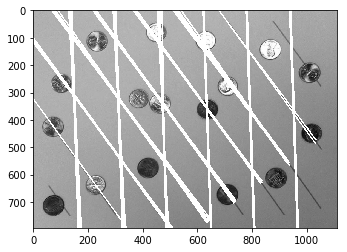

In [526]:
image=cv.imread("resources/coins.jpg",0)
for l in lines:
    theta = np.deg2rad(l[0])
    p = l[1]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = p * a
    y0 = p * b
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(image, (y1, x1),(y2,x2), (255, 0, 0), 3)
plt.imshow(image, cmap = "gray")
    

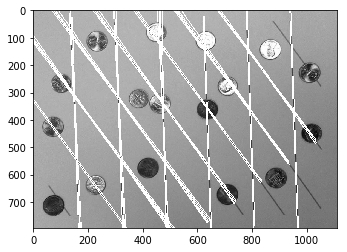

In [530]:
image2 = cv2.imread('resources/coins.jpg', cv.IMREAD_GRAYSCALE)
lines_builtin = cv.HoughLines(edges,1,np.pi/180,170)
for l in lines_builtin:
    theta = l[0][1]
    rho = l[0][0]
    a = np.cos(theta) 
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(image2,(x1, y1),(x2,y2),(255, 0,0),2)


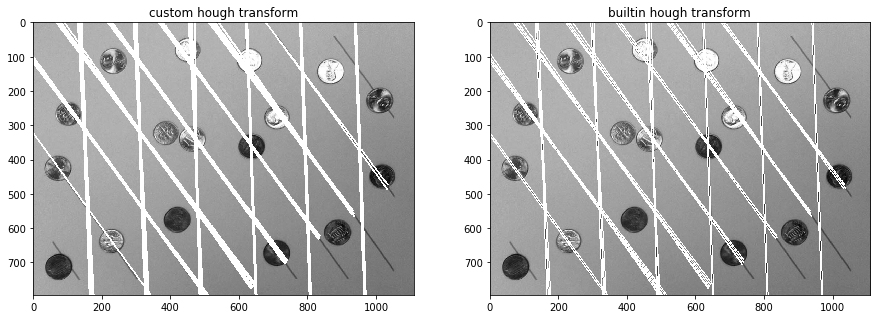

In [534]:
fig, axs = plt.subplots(1,2, figsize = (15,15))
axs[0].set_title("custom hough transform")
axs[1].set_title("builtin hough transform")
axs[0].imshow(image,cmap = "gray")
axs[1].imshow(image2, cmap = "gray")